# Exploring data-related jobs in H-1B Visa applications

> The report provides an exploratory analysis of data related jobs in the United States. The H-1B visa is a highly regulated employer-sponsored temporary work visa that allows foreign workers of specialized fields to remain in the United States. The U.S. Deptartment of Labor strictly scrutinizes several parameters to maintain a balance in the availability, wages and distribution in these jobs throughout the country. This dataset thus presents a fair estimation of different jobs category, and in the absence of a better documentation, I take this dataset to explore data-related jobs in the US. I take a subset of this dataset to explore the trends in data-related jobs over the years 2011 to 2016. This report shows that the difference in prevailing wages and proposed wage differ significantly in different job statuses and as well impact the certification of LCA by the Dept. of Labor.  



## Introduction 

### The H-1B Visa 

"The H-1B is a visa in the United States [...] which allows U.S. employers to employ *foreign workers* in specialty occupations. The regulations define a *"specialty occupation"* as requiring theoretical and practical application of a body of *highly specialized knowledge* in a field of human endeavor including but not limited to biotechnology, chemistry, architecture, engineering, mathematics, physical sciences, social sciences, medicine and health, education, law, accounting, business specialties, theology, and the arts, and requiring the attainment of a bachelor's degree or its equivalent as a minimum [...]. H-1B work-authorization is strictly limited to employment by the *sponsoring employer*."  
(source: Wikipedia) 

For a foreign national to apply for H1-B visa, an US employer must offer a job and apply for H-1B visa with the US Department of Labor on behalf of the employee. There are three steps in the application process:

Step 1: Employers fill a Labor Condition Application (LCA) with the U.S. Department of Labor. 

Step 2: The Department of Labor examines the LCA. The application could be broadly categorized as "certified" or "denied" depending on several factos in the application (prevailing wage, for example). If the application is certified, sponsors file a petition with USCIS for H-1B visa approval. This approval does not guarantee the visa.

Step 3: If USCIS approves the petition, the employee then applies for the visa at the U.S embassy of their country of origin where they are due for interview upon which they might or might not get granted the visa.


### About the dataset

The dataset can be downloaded from Kaggle: https://www.kaggle.com/nsharan/h-1b-visa

The dataset presents a list of applications in step 1 as described above: filling a LCA. The current dataset is a abridged version of the actual dataset (see details here: https://sharan-naribole.github.io/2017/02/24/h1b-eda-part-I.html). The original dataset from the U.S. Department of Labor includes 40 different categories. In this wrangled version, the prevailing wage was normalized to yearly wage for all the rows. The current dataset contains 3002458 observations for 11 categories/attributes.

The LCA could be denied for several reasons. Some of these reasons are: 

- Employers failing to pay the prevailing wage to the foreign worker 

- Job offer legitimately requires specialty knowledge due to the lack of the same in potential U.S. candidates. 

- Business requirements did not meet the standards of the Department of Labor 

- Logistic errors such as failing to pay the application fee or missing required information etc.  


### Data-related jobs in the U.S.  

Pertinent to the focus of this program, I explore only the data-related jobs in this report. I take a subset of this dataset that closely matches to all data related jobs (i.e., keyword containing "data" and "machine learning"). I explore the distribution of these jobs, including the number of applications, top states, cities, employers, prevailing wages and job categories. In the end, I ask three analytic questions and answer each one with a combination of statistics and visualizations. These questions are:

1. Is there a significant difference in the LCA certification (i.e., "Certified" or "Denied") of data-related jobs on the basis of the prevailing wage? 

2. For top values of independent variables (e.g., fulltime position, job title, employer etc.) is there a significant difference in the LCA certification in terms of the prevailing wage? 

3. Is there a significant difference between the certified and denied cases in terms of wage distributions of full-time positions?



In [143]:
#Importing packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [146]:
h1b['Unnamed: 0'].count()

3002458

In [152]:
# Load data and select subset of data-related jobs 
h1b = pd.read_csv('h1b.csv')

#selecting job titles including "data" and/or "machine learning"
data_jobs = h1b[h1b['JOB_TITLE'].str.contains("DATA|MACHINE LEARNING")==True]  #66417 rows
data_jobs.head()



,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
1730,1731,CERTIFIED,BRAMBLES USA INC.,GENERAL AND OPERATIONS MANAGERS,"SENIOR DIRECTOR, DATA PLATFORM ENGINEERING AND...",Y,197475.0,2016.0,"MILPITAS, CALIFORNIA",-121.899574,37.432334
3214,3215,CERTIFIED,HAVAS MEDIA GROUP USA LLC,MARKETING MANAGERS,SUPERVISOR - MKTG ANALYTICS & DATA CONSULTING,Y,108493.0,2016.0,"NEW YORK, NEW YORK",-74.005941,40.712784
3345,3346,CERTIFIED,"STELLA & DOT, LLC",MARKETING MANAGERS,PRODUCT MANAGER DATA OPTIMIZATION,Y,110074.0,2016.0,"SAN BRUNO, CALIFORNIA",-122.411083,37.630490
3372,3373,CERTIFIED,"RAZORFISH, LLC",MARKETING MANAGERS,"GROUP DIRECTOR, DATA ANALYTICS",Y,144123.0,2016.0,"NEW YORK, NEW YORK",-74.005941,40.712784
3772,3773,CERTIFIED,"AUTOGRID SYSTEMS, INC.",MARKETING MANAGERS,"MANAGER, BUSINESS VALUE AND DATA ANALYTICS",Y,144893.0,2016.0,"REDWOOD CITY, CALIFORNIA",-122.236355,37.485215


In [151]:
print("Data related jobs in this dataset are {} % of the total jobs."
      .format(round(data_jobs['Unnamed: 0'].count()/h1b['Unnamed: 0'].count(),3)))


Data related jobs in this dataset are 0.022 % of the total jobs.


In [153]:
#Displaying  variable descriptions, unique values, and missing values for quick future reference

type(data_jobs.columns)
type(data_jobs.columns.tolist())
info_index = data_jobs.columns.tolist()

#Information about the dataset
variables_desc = ['Unique application index', 'LCA Status: Certified/Denied etc.', 'Employer Name', 'Standard Occupational Classification Code', 'Job Title', 'Fulltime Position',
        'Prevailing wage', 'Application Year', 'Worksite Location: city and state', 'Longitude', 'Lattitude'] 

variable_info = pd.DataFrame(variables_desc, columns=['Variable Description'], index=info_index)
variable_info


# Data Type
variable_type = []
for variable in data_jobs.iloc[1, :]:
    variable_type.append(type(variable))

variable_type = pd.DataFrame(variable_type, columns=['Variable Type'], index=info_index)

# Unique values
data_uv = []

# Missing values
data_nan = []    

for index in range(11):
    data_uv.append(data_jobs.iloc[:, index].unique().shape[0])
    data_nan.append(data_jobs.iloc[:,index].isnull().sum())

data_uv = pd.DataFrame(data_uv, columns=['Unique Values Count'], index=info_index)
data_nan = pd.DataFrame(data_nan, columns=['Missing Values Count'], index=info_index)

variable_info = pd.concat([variable_info, variable_type, data_uv, data_nan], axis=1)

variable_info  #for data related jobs ("data_jobs") in 2011-16

,Variable Description,Variable Type,Unique Values Count,Missing Values Count
Unnamed: 0,Unique application index,<class 'numpy.int64'>,66417,0
CASE_STATUS,LCA Status: Certified/Denied etc.,<class 'str'>,4,0
EMPLOYER_NAME,Employer Name,<class 'str'>,12787,1
SOC_NAME,Standard Occupational Classification Code,<class 'str'>,359,617
JOB_TITLE,Job Title,<class 'str'>,9968,0
FULL_TIME_POSITION,Fulltime Position,<class 'str'>,2,0
PREVAILING_WAGE,Prevailing wage,<class 'numpy.float64'>,6405,0
YEAR,Application Year,<class 'numpy.float64'>,6,0
WORKSITE,Worksite Location: city and state,<class 'str'>,2483,0
lon,Longitude,<class 'numpy.float64'>,1715,1185


In [6]:
#data_jobs[data_jobs.JOB_TITLE.str.contains('SCIENTIST')==True]

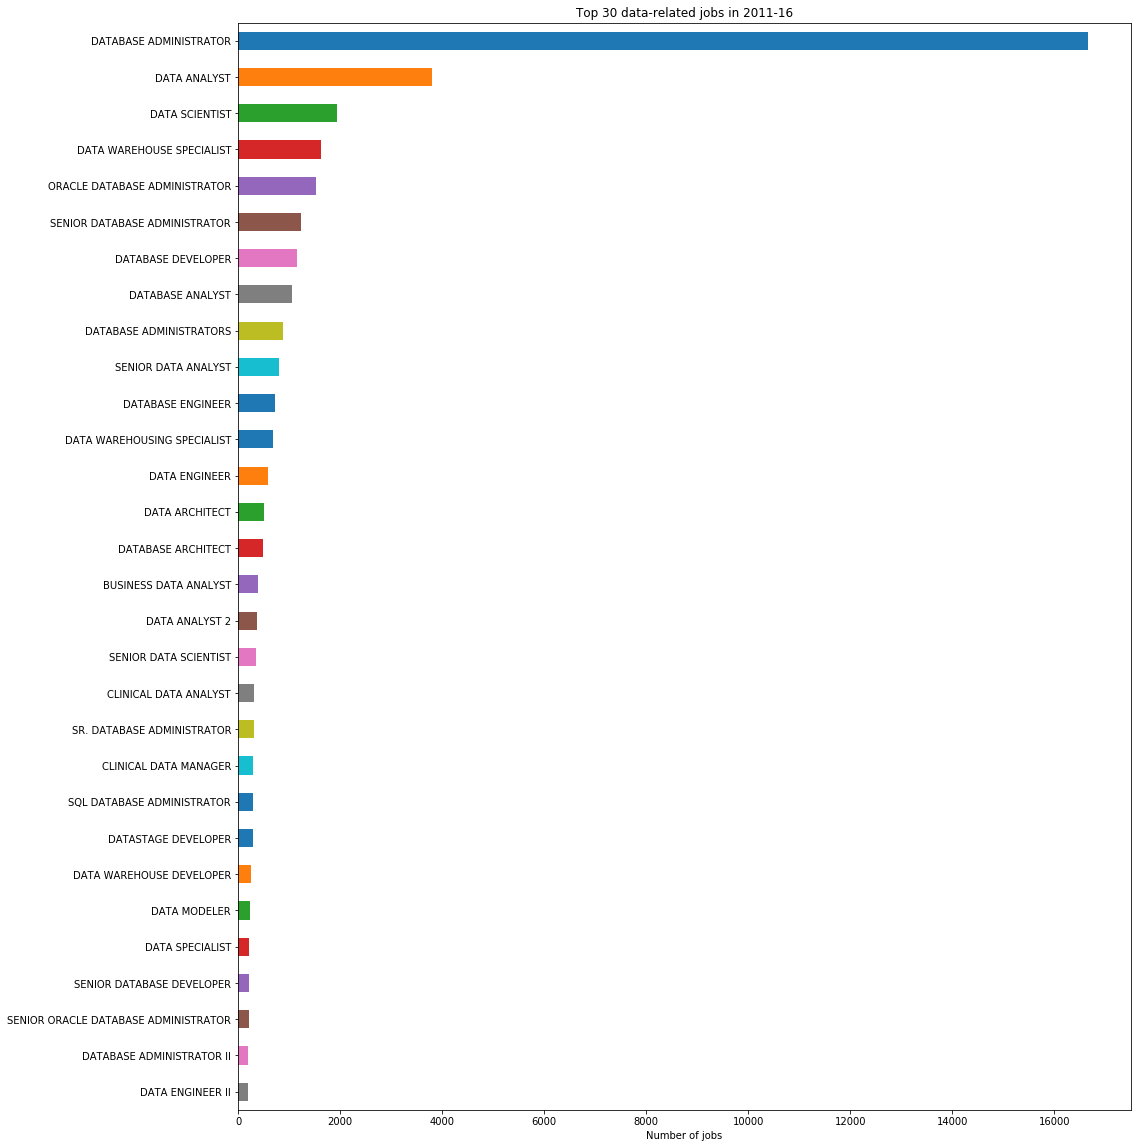

In [7]:
#Exploring top 100 data-related jobs over 2011-16

top_data_jobs = data_jobs.JOB_TITLE.value_counts().head(100)
#print(data_jobs.JOB_TITLE.value_counts().head(100)) #top 100 data job for manual inspection
#pd.options.display.max_rows = 100 #prevents from truncating output, and shows all 100 rows 
#print(top_data_jobs)

ax = top_data_jobs.head(30).plot(kind='barh', figsize=(16, 20), 
            title='Top 30 data-related jobs in 2011-16')
ax.set_ylabel('', visible=True)
ax.tick_params(direction='out')
ax.invert_yaxis()
ax.set_xlabel('Number of jobs')
plt.show()

A quick visual inspection of the top 100 data related jobs reveals that there are similar job titles with various rankings which could be categorized within the same job category. For example, the "Data Analyst" job title have several ranks such as "Senior Data Analyst", "Data analyst II" etc. in addition to "Financial Data Analyst", "Technical Data Analyst" etc. These job titles could be categorized under a major job category "Data Analyst". I find that there are about six such major categories in which the data-related jobs could be categorized. These are - Administrator, Architect, Developer, Engineer, Scientist, and Analyst. 

Additionally, there are minor variations in the job titles (e.g., "Senior Data Analyst" and "Sr. Data Analyst" or "Data Analyst II" or "Data Analyst 2") which are counted as different jobs titles. I am ignoring these for now as the numbers of such titles are not many. 


In [154]:
#defining a function for categorizing major job titles.

def job_categories(category):
    key_cat = top_data_jobs[top_data_jobs.index.str.contains(category)]
    return key_cat.to_frame() #creates a dataframe object required for Transposing in the following function


admin_jobs = job_categories("ADMINISTRATOR")
architect_jobs = job_categories("ARCHITECT")
dev_jobs = job_categories("DEVELOPER")
engg_jobs = job_categories("ENGINEER")
sci_jobs = job_categories("SCIENTIST")
analyst_jobs = job_categories("ANALYST")

#sci_jobs

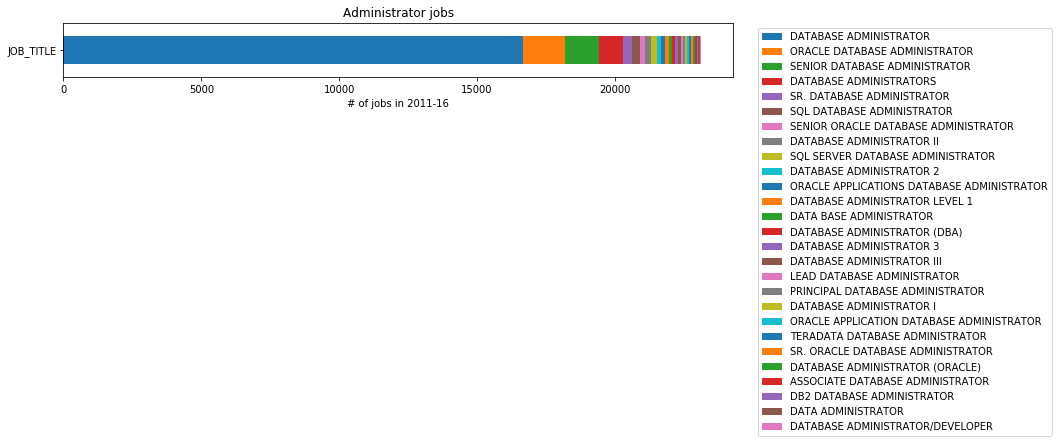

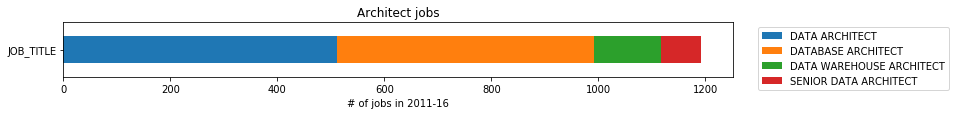

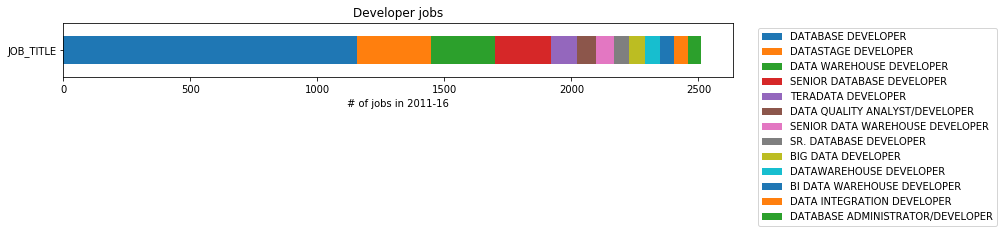

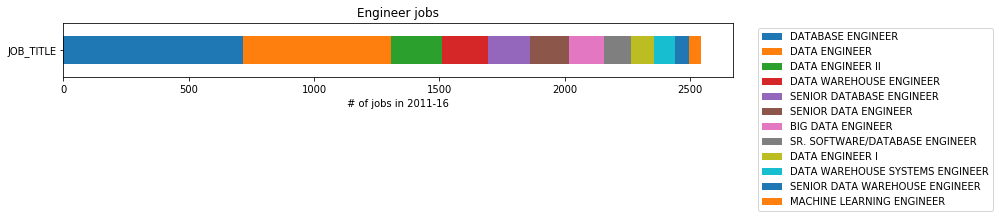

In [155]:
# Visualizing top job categories  

def job_categories_plot(job_categories, name):
   # ax = job_categories.T.plot.barh(stacked=True, edgecolor='none')
    #fig, ax = plt.subplots(figsize=(14,5), subplot_kw=dict(aspect="equal"))
    ax = job_categories.T.plot.barh(stacked=True, figsize=(12,1))
    horiz_offset = 1.03
    vert_offset = 1
    ax.legend(bbox_to_anchor=(horiz_offset, vert_offset))
    ax.set_xlabel("# of jobs in 2011-16")
    ax.set_ylabel('',visible=False)
    ax.set_title(name)
    #ax.scatter((0.6),(0.5), s=81, c="limegreen", transform=ax.transAxes)
    return plt.show()   

job_categories_plot(admin_jobs,"Administrator jobs" )
job_categories_plot(architect_jobs, "Architect jobs")
job_categories_plot(dev_jobs, "Developer jobs")
job_categories_plot(engg_jobs, "Engineer jobs")

Our major focus for this program are the Data Scientist and the Data Analyst jobs. In the following bar charts we see that there are more Data Anlyst jobs than Data Scientist job. This is undoubtedly shown in the variety of jobs represented in the analyst bar chart, and it is because the Data Analyst job responsibilities require less sofisticated knowledge of statistics, while a more specilized knowledge of the technical field is required. Business Data Analyst, for example, requires knowledge in finance and business administration.   


These are top 3 Data Scientist jobs and their numbers in 2011-16.                          JOB_TITLE
DATA SCIENTIST                 1932
SENIOR DATA SCIENTIST           350
ASSOCIATE DATA SCIENTIST         51


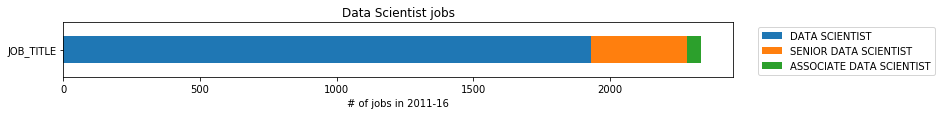

In [10]:
# DS and DA jobs
print("These are top 3 Data Scientist jobs and their numbers in 2011-16." + str(sci_jobs.head(5)))
job_categories_plot(sci_jobs, "Data Scientist jobs")

These are top 5 Data Analyst jobs and their numbers in 2011-16.                       JOB_TITLE
DATA ANALYST                3805
DATABASE ANALYST            1050
SENIOR DATA ANALYST          796
BUSINESS DATA ANALYST        394
DATA ANALYST 2               362


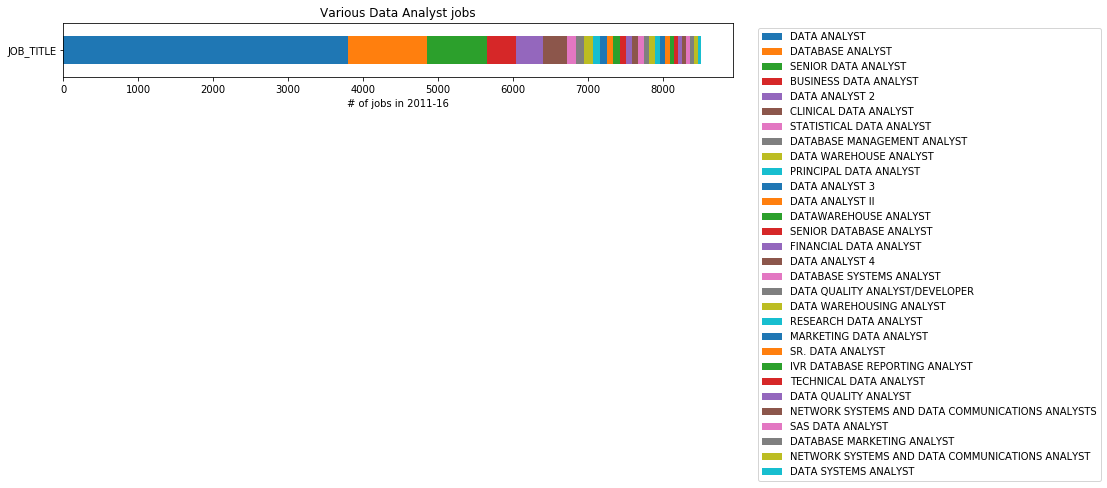

In [11]:
print("These are top 5 Data Analyst jobs and their numbers in 2011-16." + str(analyst_jobs.head(5)))
job_categories_plot(analyst_jobs, "Various Data Analyst jobs")

I am interested to see the growth of these jobs over the years. 

Data related jobs constitute 0.017 and 0.028 percent of all jobs.


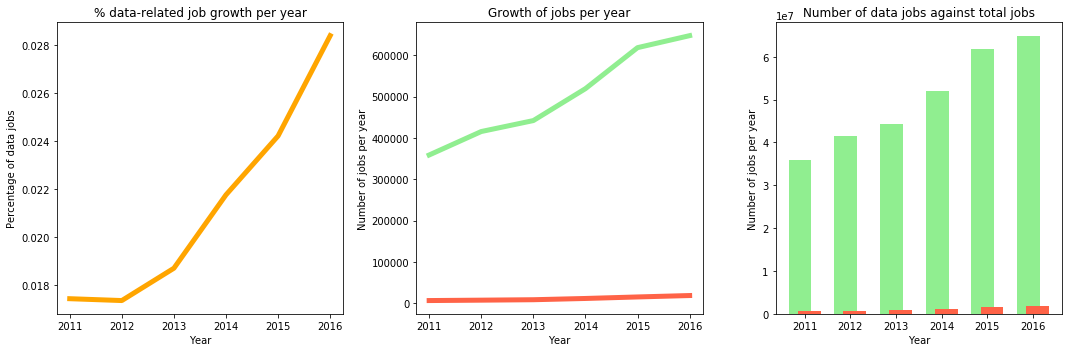

In [12]:
# % calculation for comparing data jobs with total jobs 

jobs_per_year = h1b.groupby(['YEAR'])['Unnamed: 0'].count()
data_jobs_per_year = data_jobs.groupby(['YEAR'])['Unnamed: 0'].count()
perc_job = data_jobs_per_year/jobs_per_year 
print("Data related jobs constitute {} and {} percent of all jobs.".format(round(perc_job.min(),3), round(perc_job.max(),3)))

plt.figure(figsize=(15,5))

# % growth of data related jobs per year
plt.subplot(1,3,1)
plt.plot(perc_job, linewidth=5, color='orange')
plt.title('% data-related job growth per year')
plt.xlabel('Year')
plt.ylabel('Percentage of data jobs')

# Number of data and total jobs per year, line plot
plt.subplot(1,3,2)
plt.plot(data_jobs_per_year, linewidth=5, color='tomato')
plt.plot(jobs_per_year, linewidth=5, color='lightgreen')
plt.xlabel('Year')
plt.ylabel('Number of jobs per year')
plt.title('Growth of jobs per year')

# Number of data and total jobs per year, bar plot
plt.subplot(1,3,3)
plt.bar(jobs_per_year.index-0.1, jobs_per_year.values*100, width=0.5, color='lightgreen', align='center')
plt.bar(data_jobs_per_year.index+0.1, data_jobs_per_year.values*100,width=0.5,color='tomato',align='center')
plt.title('Number of data jobs against total jobs')
plt.xlabel('Year')
plt.ylabel('Number of jobs per year')

plt.tight_layout()
plt.show()


In [13]:
# Distribution of full time positions in the jobs.

h1b['FULL_TIME_POSITION'].value_counts(normalize=True)*100  #65.49% ftp, 34.5% contract
data_jobs['FULL_TIME_POSITION'].value_counts(normalize=True)*100 #65.22% ftp, 34.77% contract

Y    84.406101
N    15.593899
Name: FULL_TIME_POSITION, dtype: float64

These visualizations show that data-related jobs constitute a small portion (e.g., 1.7% - 2.8%) of the total jobs available over the years. However, it has seen steady increase over the years. These seems to be a regulated distribution of fulltime positions (all jobs: 65.49%, data jobs: 65.22%) and contractual positions (all jobs: 34.5%, data jobs: 34.77%). Next, I am interested to see where the data jobs are. 

In [14]:
#splitting WORKSITE to state and city, and adding those to the actual dataset. 

h1b['state'] = h1b.WORKSITE.apply(lambda x: x.split(', ')[-1]) 
h1b['city'] = h1b.WORKSITE.apply(lambda x: x.split(', ')[0])

#Reassigning the data related jobs, now with the state and city location information 

data_jobs = h1b[h1b['JOB_TITLE'].str.contains("DATA|MACHINE LEARNING")==True]  #still 66417 rows
#data_jobs.info()

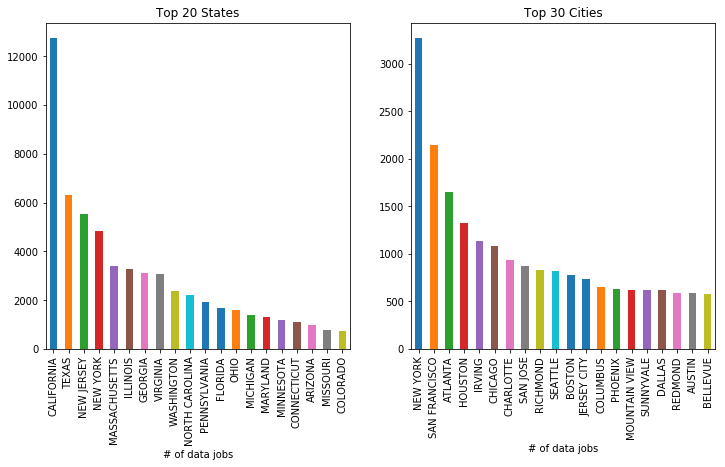

In [15]:
plt.figure(figsize=(12,6))

#Top 20 states
plt.subplot(1, 2, 1)
data_jobs.state.value_counts().head(20).plot(kind='bar')
plt.title('Top 20 States')
plt.xlabel('# of data jobs')
#plt.gca().invert_yaxis()


#Top 30 cities
plt.subplot(1, 2, 2)
data_jobs.city.value_counts().head(20).plot(kind='bar')
plt.title('Top 30 Cities')
plt.xlabel('# of data jobs')
#plt.gca().invert_yaxis()

plt.show()

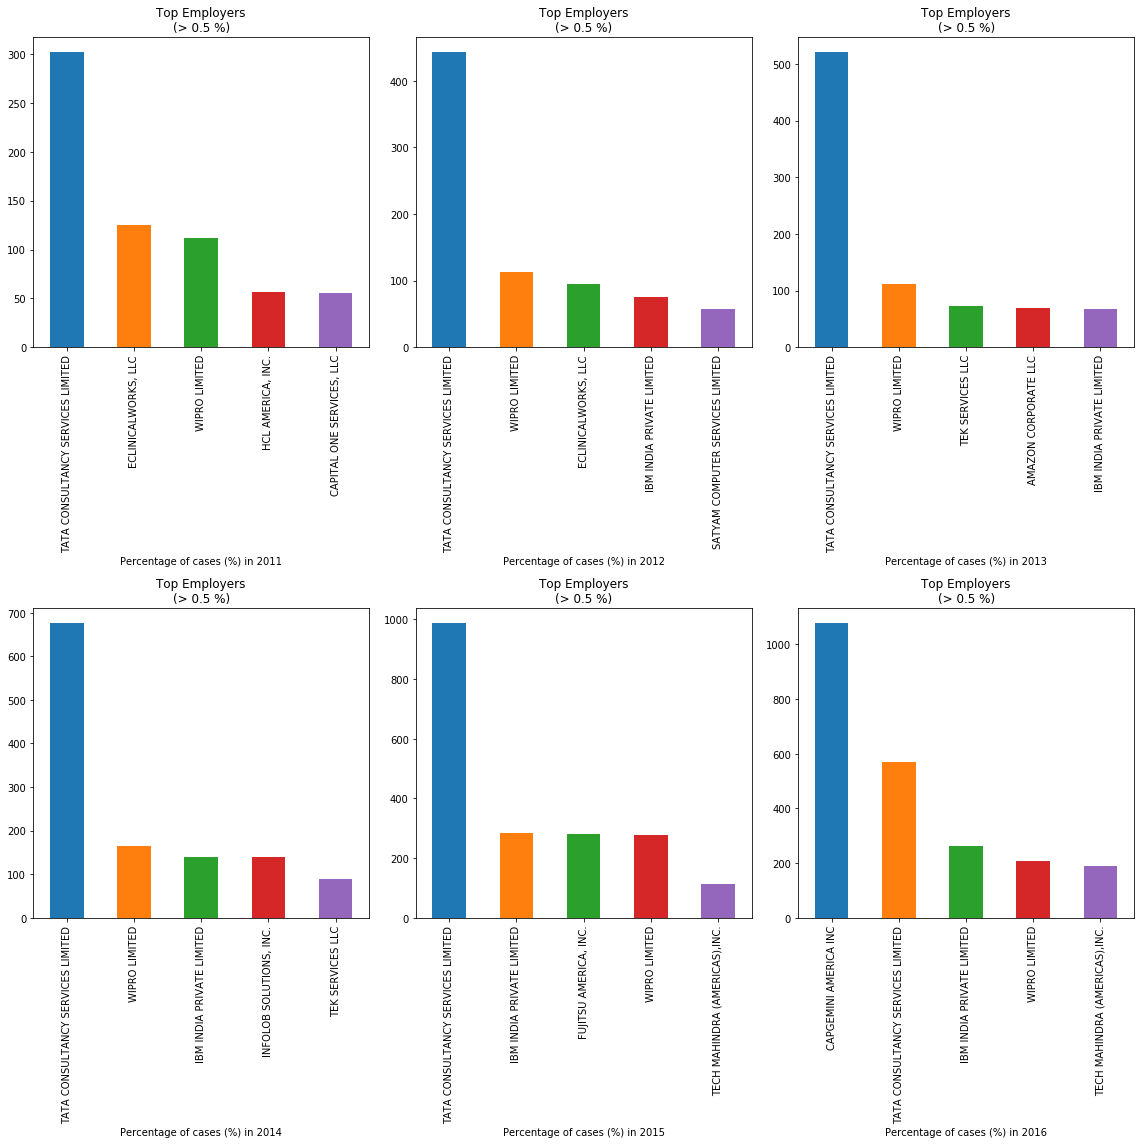

In [66]:
#defining a function for yearly estimate of columns 
def yearly(year, column):
    #selecting top 5 values for each year
    top5_col = data_jobs[data_jobs['YEAR']==year].EMPLOYER_NAME.value_counts().head(5)
    top5_col.plot(kind='bar', linewidth=2) 
    plt.title('Top Employers\n(> 0.5 %)')
    plt.xlabel('Percentage of cases (%) in {}'.format(str(year)))
  #  plt.xticks(rotation=40)
    return

plt.figure(figsize=(16,16))

plt.subplot(2, 3, 1)
yearly(2011, 'EMPLOYER_NAME')

plt.subplot(2, 3, 2)
yearly(2012, 'EMPLOYER_NAME')

plt.subplot(2, 3, 3)
yearly(2013, 'EMPLOYER_NAME')

plt.subplot(2, 3, 4)
yearly(2014, 'EMPLOYER_NAME')

plt.subplot(2, 3, 5)
yearly(2015, 'EMPLOYER_NAME')

plt.subplot(2, 3, 6)
yearly(2016, 'EMPLOYER_NAME')
plt.title('Top Employers\n(> 0.5 %)')

plt.tight_layout()
plt.show()



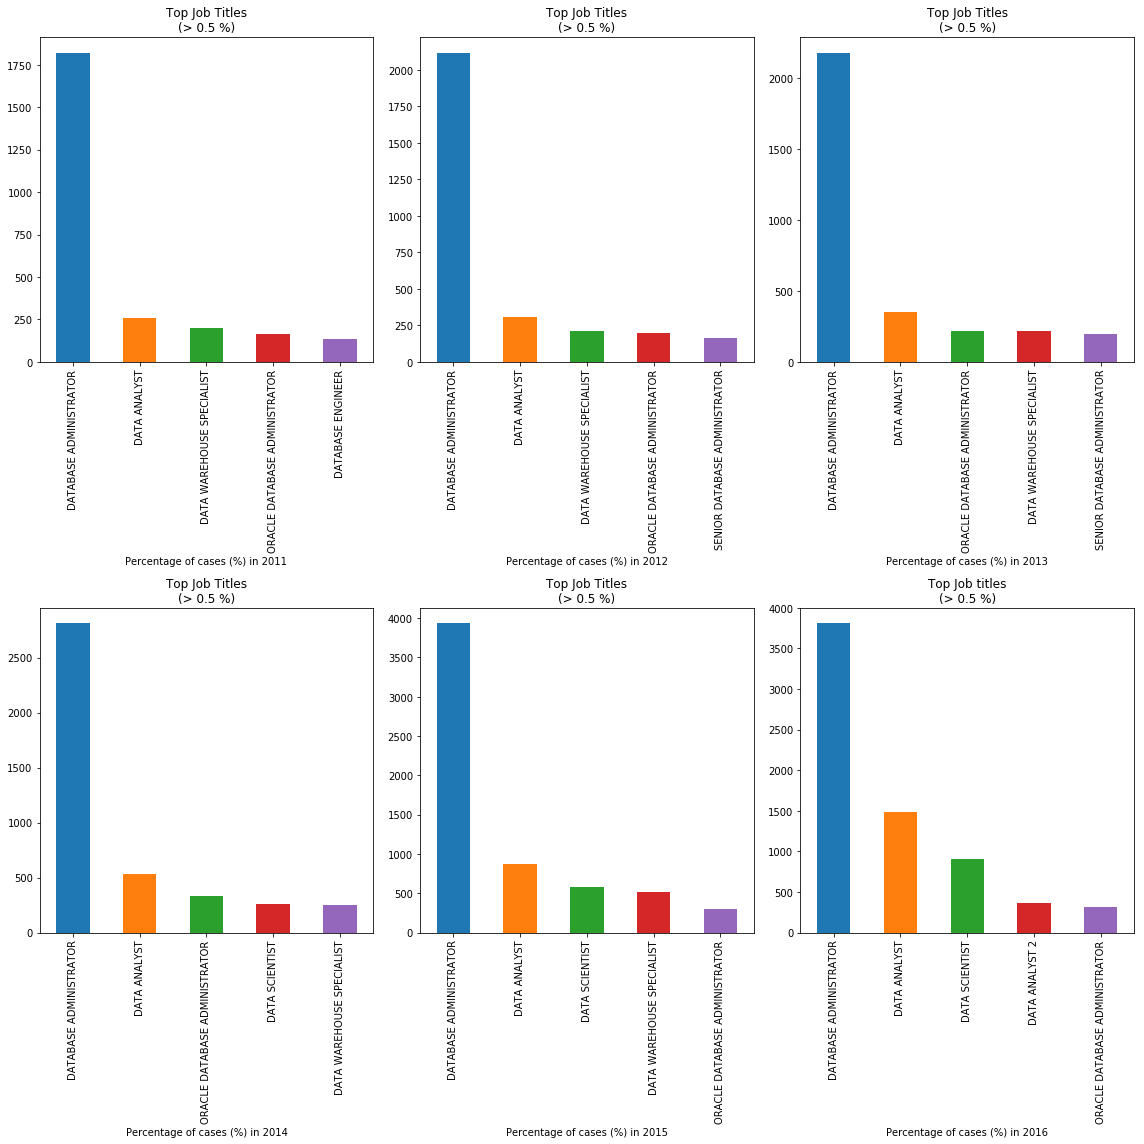

In [119]:
#defining a function for yearly estimate of columns 
def yearly(year, column):
    #selecting top 5 values for each year
    top5_col = data_jobs[data_jobs['YEAR']==year].JOB_TITLE.value_counts().head(5)
    top5_col.plot(kind='bar', linewidth=2) 
    plt.title('Top Job Titles\n(> 0.5 %)')
    plt.xlabel('Percentage of cases (%) in {}'.format(str(year)))
    #plt.xticks(rotation=60)
    return

plt.figure(figsize=(16,16))

plt.subplot(2, 3, 1)
yearly(2011, 'JOB_TITLE')

plt.subplot(2, 3, 2)
yearly(2012, 'JOB_TITLE')

plt.subplot(2, 3, 3)
yearly(2013, 'JOB_TITLE')

plt.subplot(2, 3, 4)
yearly(2014, 'JOB_TITLE')

plt.subplot(2, 3, 5)
yearly(2015, 'JOB_TITLE')

plt.subplot(2, 3, 6)
yearly(2016, 'JOB_TITLE')
plt.title('Top Job titles\n(> 0.5 %)')

plt.tight_layout()
plt.show()



In [67]:
# Function selecting data corresponding to a given year and a given variable (cross-sectional exploration)

def cross_sectional(data, year, column, tradeoff):
    data = data.loc[lambda df: data_jobs['YEAR']==year]
    
    # Compute the percentage of filled LCA 
    modified_column_percents = data_jobs[column].value_counts(normalize=True)*100
    
    # Select entries having > tradeoff% of total filled LCA
    modified_column_percents_top = modified_column_percents.loc[lambda df: modified_column_percents > tradeoff]
    
    modified_column_percents_top.plot(kind='barh')
    
    return

In [72]:
def top_values_per_year(YEAR):

    data_ftp = data_jobs['FULL_TIME_POSITION'].value_counts(normalize=True)

    # Plot the corresponding bar plots in a subplot
    plt.figure(figsize=(16,16))

    # Top employers in YEAR
    plt.subplot(2, 2, 1)
    cross_sectional(data_jobs, YEAR, 'EMPLOYER_NAME', .5)
    plt.title('Top Employers\n(> 0.5 %)')
    plt.xlabel('Percentage of cases (%)')
    plt.gca().invert_yaxis()

    # Top job titles in YEAR
    plt.subplot(2, 2, 2)
    cross_sectional(data_jobs, YEAR, 'JOB_TITLE', 0.75)
    plt.title('Top Job Title\n(> 1%)')
    plt.xlabel('Percentage of cases (%)')
    plt.gca().invert_yaxis()


   # Top specialty occupations in YEAR
    plt.subplot(2, 2, 3)
    cross_sectional(data_jobs, YEAR, 'SOC_NAME', 1.5)
    plt.title('Top Special Occupation\n(> 1%)')
    plt.xlabel('Percentage of cases (%)')
    plt.gca().invert_yaxis()


   #Full time positions (Y or N)
    plt.subplot(2, 2, 4)
    data_ftp.plot(kind='barh')
    plt.title('Full Time Positions')
    plt.xlabel('Percentage of cases (%)')
    plt.gca().invert_yaxis()


    plt.tight_layout()
    plt.suptitle(' Top values in ' +  str(YEAR), fontsize=20)  
    return plt.show()


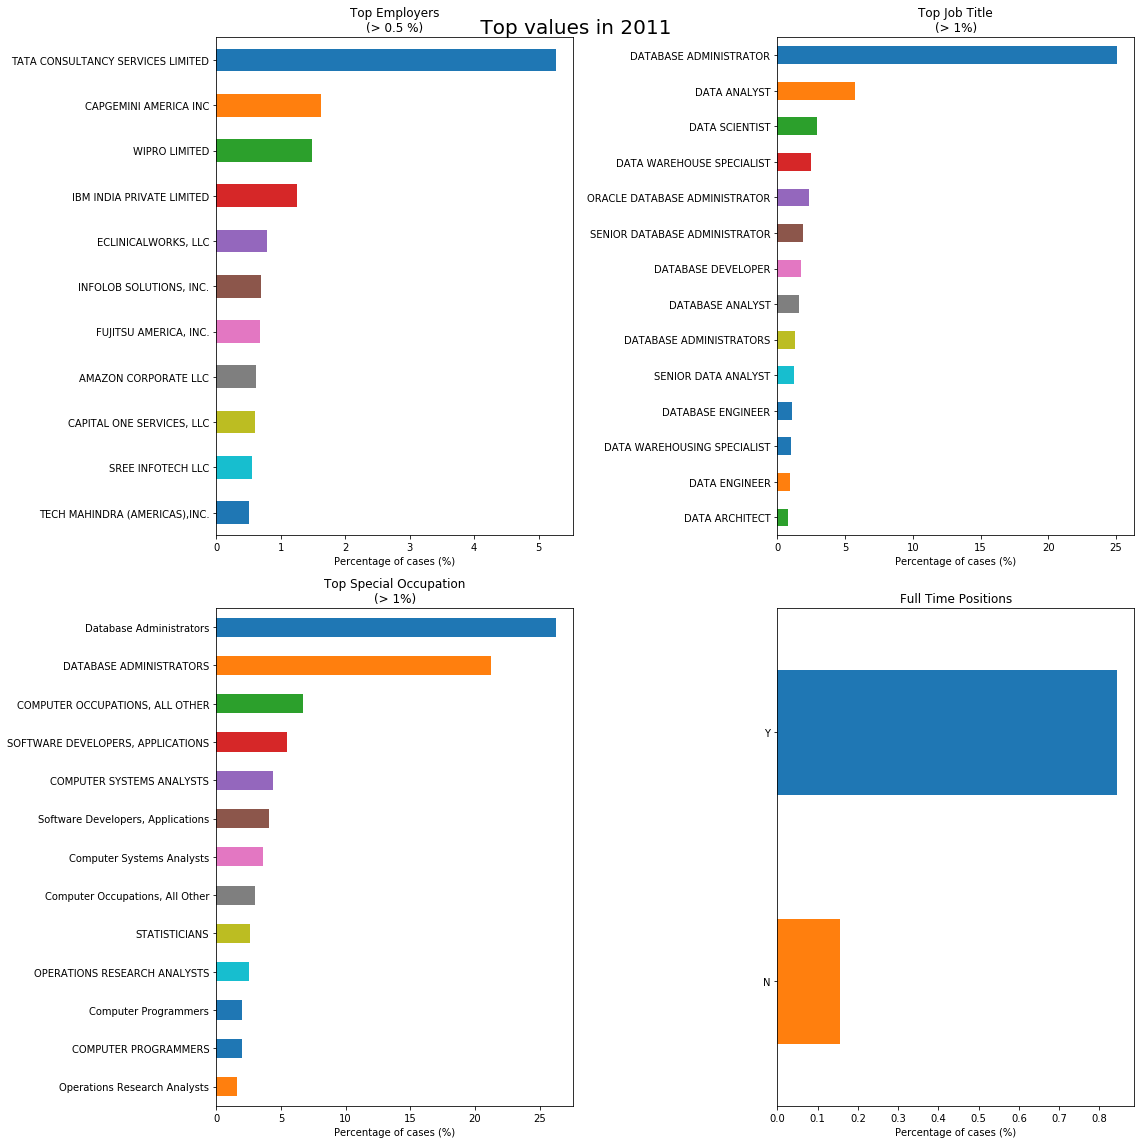

In [73]:
top_values_per_year(2011)
#top_values_per_year(2012)
#top_values_per_year(2014)


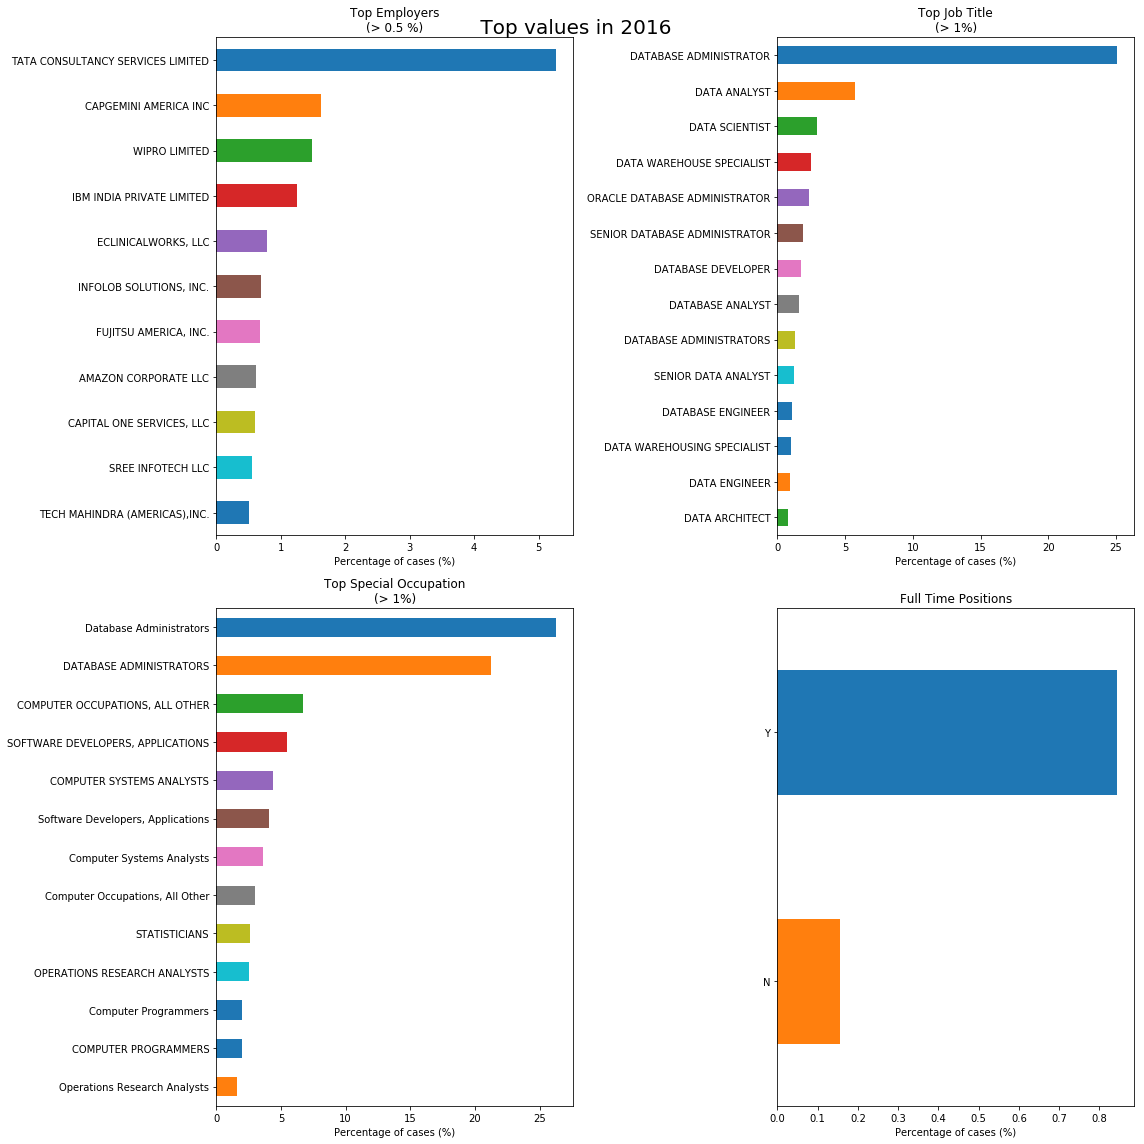

In [120]:
top_values_per_year(2016)

In [81]:
# PREVAILING_WAGE
def wage_year(data, year, lim):
    data = data_jobs.loc[lambda df: data_jobs['YEAR']==year]
    data_wage = data['PREVAILING_WAGE'].dropna() / 1000 # removes NaN and convert to $k
    data_wage = data_wage.loc[lambda df: data_wage < lim] # select wages under $_lim_k

    # Plot wage distribution
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    plt.hist(data_wage, bins=50)

    plt.axvline(data_wage.median(), color='orange', linestyle='solid', linewidth=4)
    plt.axvline(data_wage.mean(), color='yellowgreen', linestyle='solid', linewidth=4)
    plt.axvline(data_wage.mean() + data_wage.std(), color='yellowgreen', linestyle='dashed', linewidth=2)
    plt.axvline(data_wage.mean() - data_wage.std(), color='yellowgreen', linestyle='dashed', linewidth=2)

    plt.xlabel('Salary ($k)')
    plt.ylabel('Counts')
    plt.title('Prevailing wage distribution')

    plt.subplot(1, 2, 2)
    plt.boxplot(data_wage)
    plt.ylabel('Salary ($k)')

    plt.show()

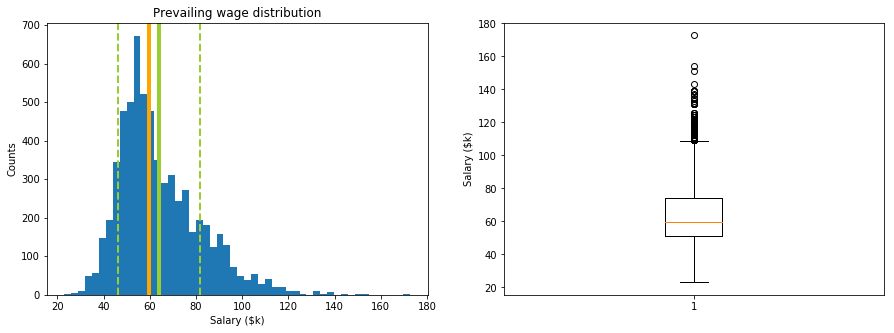

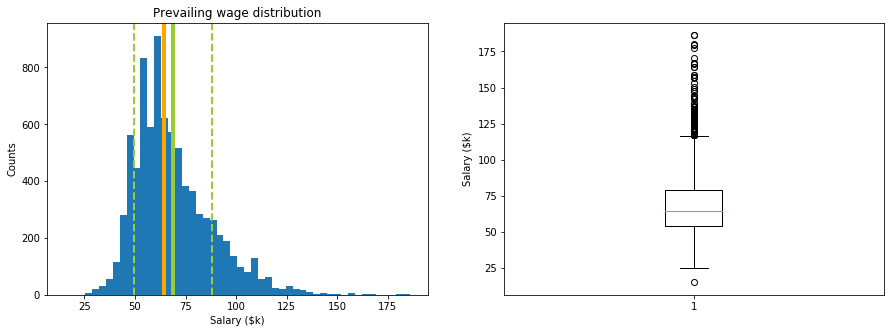

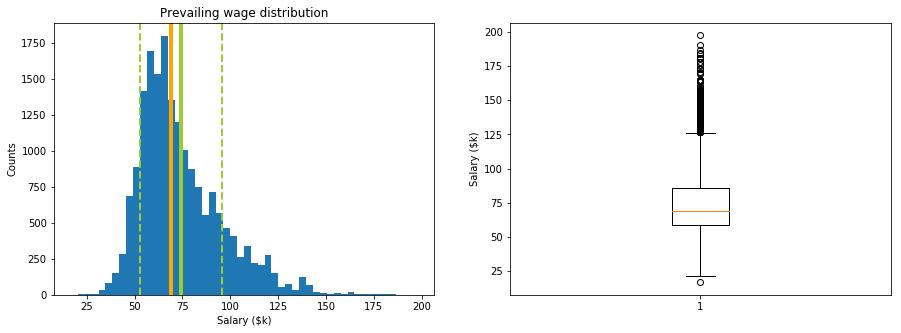

In [83]:
wage_year(data_jobs, 2011, 200)
wage_year(data_jobs, 2013, 200)
wage_year(data_jobs, 2016, 200)

#label each year

This set of visualization shows us the steady inclrease of the prevaliling wage in data-related jobs. While the mean of prevailing wages hovered aroung USD 60k in 2011, it is around USD 68k in 2016. It shows that there is a trend showing increase of the prevailing wages in these jobs. However, is there any relation between the prevailing wage and the application status? In the following, I explore the relation of the prevaliling wage with other variables.  

More precisely, I ask the following questions:

1) What is the relation between certification (i.e., "Certified" or "Denied") of data-related jobs and the prevailing wages? Or, in other words, could the prevailing wage predict the certification of the LCA?

2) For each of the variables/attributes, what features the highest number of certified/denied cases?

3) Is there a significant difference between the wage distributions of full-time position and temporary positions in the certified cases?

In [85]:
#Classifying certified and denied cases

certified = pd.concat([data_jobs.loc[lambda df: data_jobs['CASE_STATUS']=='CERTIFIED'], 
                       data_jobs.loc[lambda df: data_jobs['CASE_STATUS']=='CERTIFIED-WITHDRAWN']])

denied = pd.concat([data_jobs.loc[lambda df: data_jobs['CASE_STATUS']=='DENIED']])

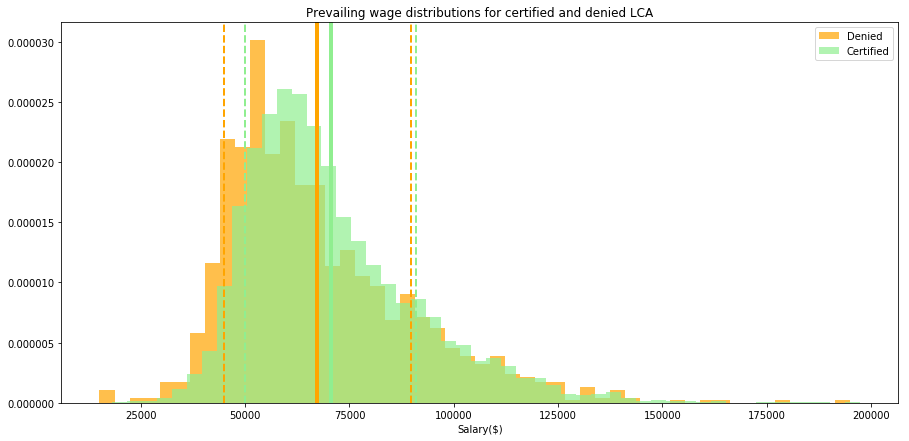

In [96]:
## Plot histogram

# Prevailing wage distributions (< $200k)
denied_wage = denied.PREVAILING_WAGE.dropna().loc[lambda df: denied.PREVAILING_WAGE < 200000]
certified_wage = certified.PREVAILING_WAGE.dropna().loc[lambda df: certified.PREVAILING_WAGE < 200000]

# Normalized histograms 
plt.figure(figsize=(15,7))
plt.hist(denied_wage, bins=50, color="orange", alpha=0.7, label='Denied', density=True)
plt.axvline(denied_wage.mean(), color="orange", linestyle='solid', linewidth=4)
plt.axvline(denied_wage.mean() + denied_wage.std(), color="orange", linestyle='dashed', linewidth=2)
plt.axvline(denied_wage.mean() - denied_wage.std(), color="orange", linestyle='dashed', linewidth=2)
    
plt.hist(certified_wage, bins=50, color="lightgreen", alpha=0.7, label='Certified', density=True)
plt.axvline(certified_wage.mean(), color="lightgreen", linestyle='solid', linewidth=4)
plt.axvline(certified_wage.mean() + certified_wage.std(), color="lightgreen", linestyle='dashed', linewidth=2)
plt.axvline(certified_wage.mean() - certified_wage.std(), color="lightgreen", linestyle='dashed', linewidth=2)

plt.xlabel('Salary($)')
plt.title('Prevailing wage distributions for certified and denied LCA')
plt.legend()
#plt.xlim([0, 200000])
plt.show()

In [106]:
from scipy.stats import ttest_ind
print("Comparing the prevailing wages of the certified and the denied cases without outlier removal.\n" 
      +"T-value: {} \np-value: {}. \n".format(ttest_ind(denied.PREVAILING_WAGE.dropna(), 
                                                       certified.PREVAILING_WAGE.dropna(), 
                                                       equal_var=False)[0], 
                                             ttest_ind(denied.PREVAILING_WAGE.dropna(), 
                                                       certified.PREVAILING_WAGE.dropna(), 
                                                       equal_var=False)[1]))

Comparing the prevailing wages of the certified and the denied cases without outlier removal.
T-value: 4.8499311907156235 
p-value: 1.3809476061703247e-06. 



In [108]:
print("Comparing the prevailing wages of the certified and the denied cases after outlier removal.\n" 
      + "T-value: {} \np-value: {}. \n".format(ttest_ind(denied_wage, 
                                                       certified_wage, 
                                                       equal_var=False)[0], 
                                             ttest_ind(denied_wage, 
                                                       certified_wage, 
                                                       equal_var=False)[1]))

Comparing the prevailing wages of the certified and the denied cases after outlier removal.
T-value: -5.102480828345408 
p-value: 3.835906889194452e-07. 



In case of comparing the prevailing wages without any upper bounds, we see that the mean of the denied cases are lower than the mean of the certified cases. This is likely impacting the decision as employers are paying lower wages to the prospective employee. Interestingly, while comparting with the upper bound, that is, when we look into the distribution where the prevailing wage is lower than USD 200k, the mean of the denied wage is higher that the mean of the certified cases. The difference between the prevailing wages of the certified cases and the denied cases are significant, as attested by extremely low the p-values. This distinction remains to be significant with or without the outlier removal. 



In [134]:
## Normalized histograms 
def plot_denied_certified_wage(certified_data, denied_data, column, category, min_wage, max_wage,
                              certified_bins, denied_bins):
    
    # Select data corresponding to category
    denied = denied_data.loc[lambda df: denied_data[column]==category]
    certified = certified_data.loc[lambda df: certified_data[column]==category]

    # Select prevailing wage 
    denied_wage = denied.PREVAILING_WAGE.dropna().loc[lambda df: denied.PREVAILING_WAGE<200000]
    certified_wage = certified.PREVAILING_WAGE.dropna().loc[lambda df: certified.PREVAILING_WAGE<200000]
    
    # Plot distributions
    plt.figure(figsize=(15,7))
    plt.hist(denied_wage, bins=denied_bins, color="tomato", alpha=0.7, label='Denied', density=True)
    plt.axvline(denied_wage.mean(), color="tomato", linestyle='solid', linewidth=4)
    plt.axvline(denied_wage.mean() + denied_wage.std(), color="tomato", linestyle='dashed', linewidth=2)
    plt.axvline(denied_wage.mean() - denied_wage.std(), color="tomato", linestyle='dashed', linewidth=2)
    
    plt.hist(certified_wage, bins=certified_bins, color="lightgreen", alpha=0.7, label='Certified', density=True)
    plt.axvline(certified_wage.mean(), color="lightgreen", linestyle='solid', linewidth=4)
    plt.axvline(certified_wage.mean() + certified_wage.std(), color="lightgreen", linestyle='dashed', linewidth=2)
    plt.axvline(certified_wage.mean() - certified_wage.std(), color="lightgreen", linestyle='dashed', linewidth=2)
    
    plt.xlabel('Salary($)')
    plt.xlim([min_wage, max_wage])
    plt.title('Prevailing wage distributions for certified and denied for {} '.format(category))
    plt.legend()
    plt.show()
    
    # Compute p-value
    print("{}\nT-value: {} \np-value: {}. \n".format(category,
                                             ttest_ind(denied.PREVAILING_WAGE.dropna(), certified.PREVAILING_WAGE.dropna(), equal_var=False)[0], 
                                             ttest_ind(denied.PREVAILING_WAGE.dropna(), certified.PREVAILING_WAGE.dropna(), equal_var=False)[1]))

In the following, I explor if there is significant differences in the wages of top employers, top job titles and full time and temporary positions.

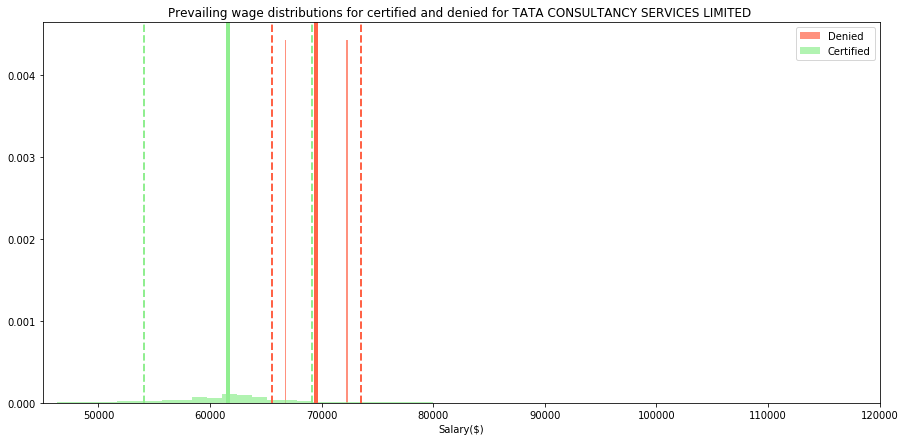

TATA CONSULTANCY SERVICES LIMITED
T-value: 2.789744989691995 
p-value: 0.21830194420354096. 



In [139]:
# Employer: Tata Consultancy Services Limited
plot_denied_certified_wage(certified, denied, 'EMPLOYER_NAME', 'TATA CONSULTANCY SERVICES LIMITED', 
                           45000, 120000, 50, 50)

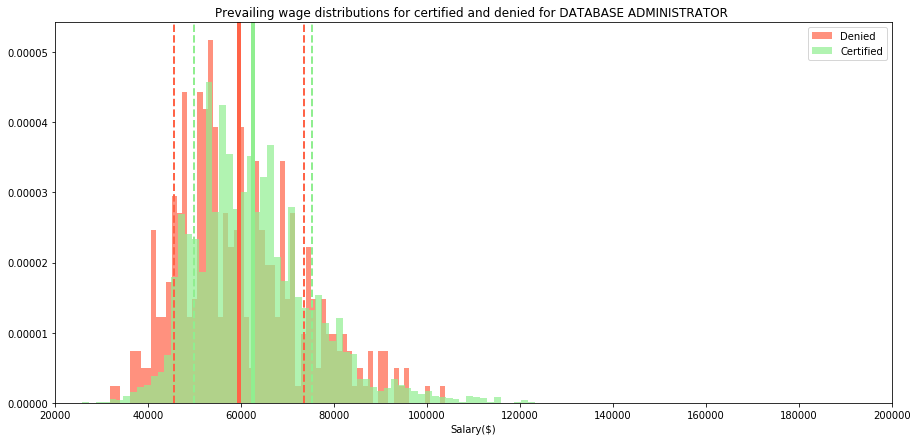

DATABASE ADMINISTRATOR
T-value: 2.6592889641356754 
p-value: 0.008166271286019716. 



In [140]:
plot_denied_certified_wage(certified, denied, 'JOB_TITLE', 'DATABASE ADMINISTRATOR', 
                           20000, 200000, 80, 80)

#rephrase the question and refer Is there a significant different between the certified and denied prevailing wages in the database administratir jobs 

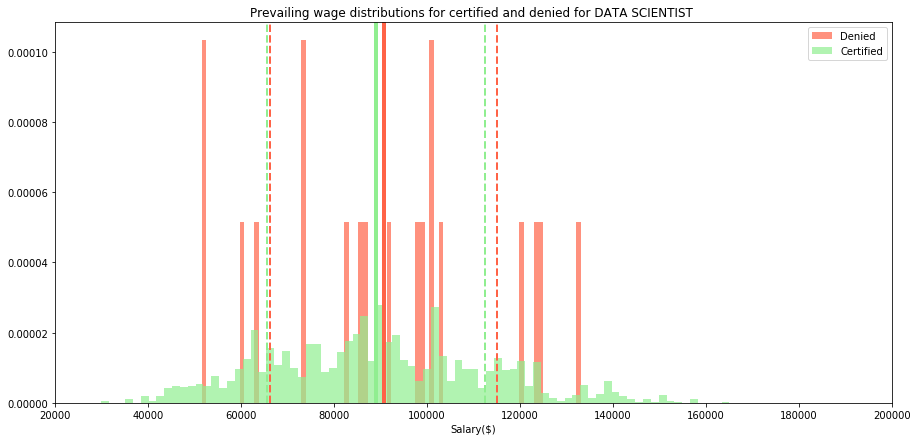

DATA SCIENTIST
T-value: 0.3042832087559287 
p-value: 0.7643371319092678. 



In [141]:
plot_denied_certified_wage(certified, denied, 'JOB_TITLE', 'DATA SCIENTIST', 
                           20000, 200000, 80, 80)

#distribution is nto normal and not 

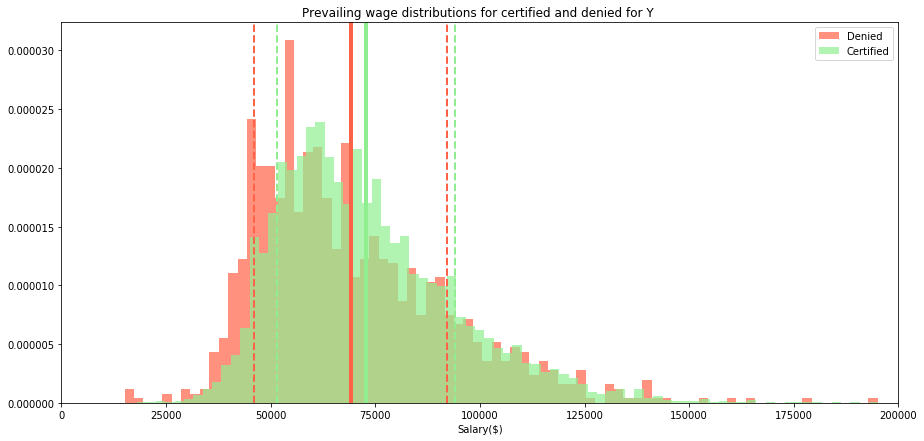

Y
T-value: 4.688161430153104 
p-value: 3.084422055945486e-06. 



In [142]:
plot_denied_certified_wage(certified, denied, 'FULL_TIME_POSITION', 'Y', 
                           0, 200000, 80, 80)

#Per these result,s the certified prevailing wage has a sig difference from the denied prevailing wage, and p-valy and 

Summarizing, we see that the prevailing wages differ significantly in the full time positions vs. temporary positions and subsequently impacts the LCA certification. 


### Further research/exploration

Some questions remain to be unanswered. A next step would be to incorporate the 2017 data (https://www.kaggle.com/jonamjar/h1b-data-set-2017/data) in this dataset after data wrangling follwing the steps provided here(https://github.com/sharan-naribole/H1B_visa_eda/blob/master/data_processing.Rmd) 

Secondly, I'd like to take up this dataset in future after learning more sofisticated data science techniques in the bootcamp. I would like to explore and predict certification of future LCA using supervised learning technics. 

Finally, there seems to be many natural language processing applications possible with this dataset. For example, one can classify different major job categories and present a detailed ontological structure of such job categories that will help job-seekers streamline their search. I look forward to learning about NLP and explore these further. 

--*--